In [1]:
%matplotlib inline
import numpy as np
from desc.equilibrium import Equilibrium
from desc.geometry import FourierRZToroidalSurface
from desc.profiles import PowerSeriesProfile
from desc.plotting import plot_1d, plot_section, plot_surfaces, new_plot_1d
import desc.io
import sys
import os
import desc.plotting as dplot
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

DESC version 0.7.2,using JAX backend, jax version=0.4.1, jaxlib version=0.4.1, dtype=float64
Using device: CPU, with 1.45 GB available memory


In [2]:
eqs = desc.io.load("/Users/liangtao/Desktop/GT/Research/DESC-master/desc/examples/DSHAPE_output.h5")
eq = eqs[-1]

In [3]:
print(eq)

Equilibrium at 0x7fe1117253d0 (L=26, M=13, N=0, NFP=1.0, sym=1, spectral_indexing=fringe)


In [4]:
print(eq.i_l)

[-1.    0.67 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.  ]


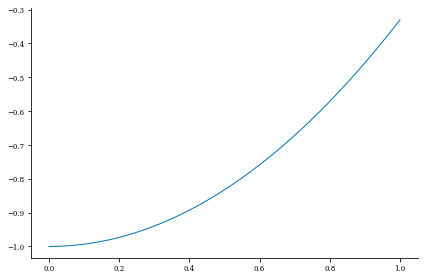

In [5]:
def init_func(x):
    y = -1 + 0.67 * (x ** 2)
    return y

n = 100
base_x = np.linspace(0, 1, n)
base_y = np.zeros(n)
for i in range(n):
    base_y[i] = init_func(base_x[i])
plt.plot(base_x, base_y)
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='$\\rho$', ylabel='$ \\iota ~(~)$'>)

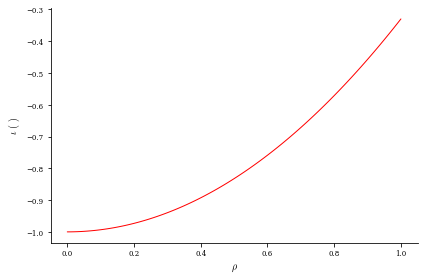

In [6]:
fig, ax = plt.subplots()
plot_1d(eq, "iota", ax=ax, linecolor = "red", label = "base")

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def init_func(x):
    y = -1 + 0.67 * (x ** 2)
    return y

n = 100
base_x = np.linspace(0, 1, n)
base_y = np.zeros(n)
for i in range(n):
    base_y[i] = init_func(base_x[i])

def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    n = 100
    x = np.linspace(0, 1, n)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)
    #print(len(y_samples.T[0]))
    for idx, single_prior in enumerate(y_samples.T):
        # add base line
        single_prior = single_prior + base_y
        # adjust to fix the point [0,0]
        single_prior = single_prior - single_prior[0]
        # normalized pressure profile at 1
        single_prior = single_prior / single_prior[n-1]
        ax.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=0.7,
            color = "blue",
        )
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$\iota(\rho)$')


In [8]:
n_samples = 1000

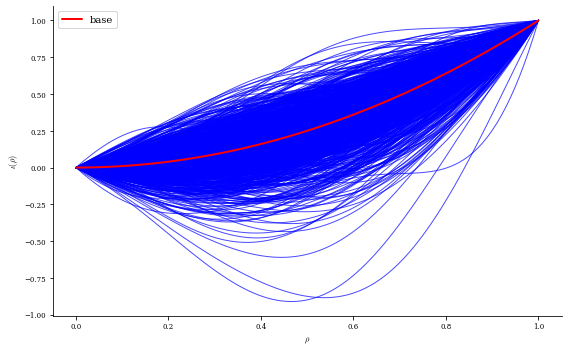

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 0.01 * RBF(length_scale=0.3, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, ax = plt.subplots(figsize=(8.0, 5.0))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=ax)
base_y = base_y - base_y[0]
base_y = base_y / base_y[n-1]
ax.plot(base_x, base_y, color = "red", label = "base", linewidth=2)
plt.legend()

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def init_func(x):
    y = -1 + 0.67 * (x ** 2)
    return y

n = 100
base_x = np.linspace(0, 1, n)
base_y = np.zeros(n)
for i in range(n):
    base_y[i] = init_func(base_x[i])

def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    n = 100
    x = np.linspace(0, 1, n)
    X = x.reshape(-1, 1)
    store = []

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)
    #print(len(y_samples.T[0]))
    for idx, single_prior in enumerate(y_samples.T):
        # add base line
        single_prior = single_prior + base_y
        store.append(single_prior)
        # adjust to fix the point [0,0]
        #single_prior = single_prior - single_prior[0]
        # normalized pressure profile at 1
        #single_prior = single_prior / single_prior[n-1]
        ax.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=0.7,
            color = "blue",
        )
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$\iota(\rho)$')
    return store

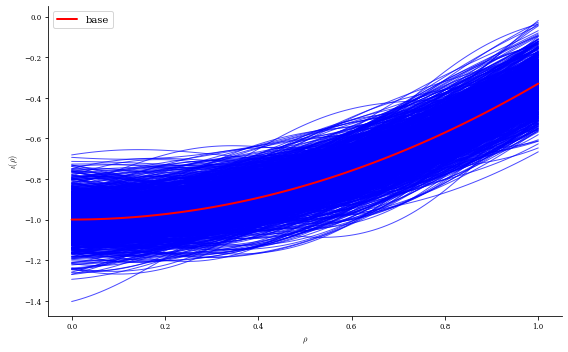

In [18]:
n_samples = 1000
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 0.01 * RBF(length_scale=0.3, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, ax = plt.subplots(figsize=(8.0, 5.0))

# plot prior
store = plot_gpr_samples(gpr, n_samples=n_samples, ax=ax)
# base_y = base_y - base_y[0]
# base_y = base_y / base_y[n-1]
ax.plot(base_x, base_y, color = "red", label = "base", linewidth=2)
plt.legend()

In [19]:
def even_polyfit(x, y, deg):
    # Make degree even
    if deg % 2 != 0:
        deg += 1

    # Calculate the Vandermonde matrix for even-powered terms
    vand_matrix = np.vander(x, deg+1)
    vand_matrix = vand_matrix[:, ::2]

    # Calculate the coefficients using least squares
    coeffs = np.linalg.lstsq(vand_matrix, y, rcond=None)[0]

    return coeffs

# Sample data points
x = np.array([-2, -1, 0, 1, 2])
y = np.array([4, 1, 2, 5, 10])

# Degree of polynomial
deg = 2

# Fit a polynomial with only even-degree terms to the sample data
coeffs = even_polyfit(base_x, base_y, deg)

print("Coefficients:", coeffs)

Coefficients: [ 0.67 -1.  ]


In [20]:
ce1 = []
ce2 = []
for i in range(len(store)):
    coeffs = even_polyfit(base_x, store[i], 2)
    ce1.append(coeffs[0])
    ce2.append(coeffs[1])

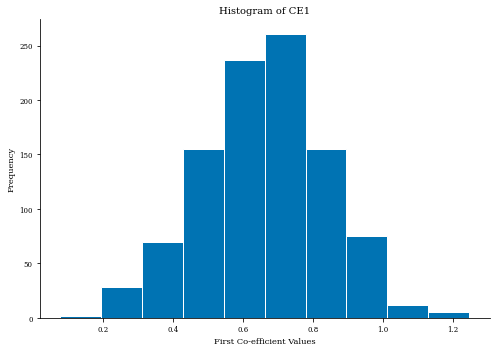

In [24]:
fig = plt.figure(figsize=(7, 5))
plt.hist(ce1, bins=10, edgecolor='white')

# Add labels and title
plt.xlabel('First Co-efficient Values')
plt.ylabel('Frequency')
plt.title('Histogram of CE1')

# Display the plot
plt.show()

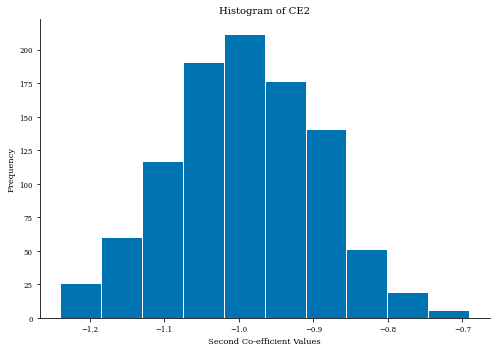

In [25]:
fig = plt.figure(figsize=(7, 5))
plt.hist(ce2, bins=10, edgecolor='white')

# Add labels and title
plt.xlabel('Second Co-efficient Values')
plt.ylabel('Frequency')
plt.title('Histogram of CE2')

# Display the plot
plt.show()